In [178]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import seaborn as sns
import censusdata
from datetime import datetime
%matplotlib inline

### Loading Predicted Vacant Lot files

In [182]:
philly_points = pd.read_csv('data/city/Vacant_Indicators_Points.csv')
philly_points.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/59c154f1c8357d22ed035e66/

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00


In [183]:
philly_points.dtypes

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [185]:
philly_points.isna().sum()

X                         0
Y                         0
OBJECTID                  0
ADDRESS                   1
OWNER1                    1
OWNER2                28556
BLDG_DESC                70
OPA_ID                   21
LNIADDRESSKEY           336
COUNCILDISTRICT           0
ZONINGBASEDISTRICT       40
ZIPCODE                 322
LAND_RANK                 2
BUILD_RANK                0
VACANT_FLAG               2
VACANT_RANK               2
dtype: int64

In [3]:
philly_points.describe()

,X,Y,OBJECTID,OPA_ID,COUNCILDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_RANK
count,36917.000000,36917.000000,36917.00000,3.689600e+04,36917.000000,36595.000000,36915.000000,36917.000000,36915.000000
mean,-75.167337,39.985244,18459.00000,3.431197e+08,4.913211,19131.573330,0.525169,0.150244,0.665391
std,0.041322,0.031944,10657.16428,2.276140e+08,2.175462,11.154188,0.343984,0.252557,0.184587
min,-75.269183,39.883301,1.00000,1.100490e+07,1.000000,19102.000000,0.000000,0.000000,0.500000
25%,-75.189216,39.968623,9230.00000,1.831285e+08,3.000000,19122.000000,0.415000,0.000000,0.500000
50%,-75.165435,39.986638,18459.00000,3.110167e+08,5.000000,19133.000000,0.500000,0.000000,0.670000
75%,-75.144508,39.999227,27688.00000,4.320889e+08,7.000000,19140.000000,0.670000,0.500000,0.670000
max,-74.964149,40.135042,36917.00000,8.886000e+08,10.000000,19154.000000,1.000000,1.000000,1.000000


In [4]:
philly_points.dtypes

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [5]:
philly_land = pd.read_csv('data/city/Vacant_Indicators_land.csv')
philly_land.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/58078a80b9e3a26d110fa20e/

,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,Shape__Area,Shape__Length
0,1,2508 CORAL ST,DUONG DEP THI,NaN,VAC LAND RES < ACRE,311103400.0,97735,1,RSA-5,19125.0,0.50,128.351562,58.941479
1,2,1441 S FALLON ST,PHILADELPHIA LAND BANK,NaN,VAC LAND RES < ACRE,273036610.0,284084,3,RSA-5,19143.0,0.67,116.269531,51.521343
2,3,604 E LIPPINCOTT ST,MCIVOR JAMISA,NaN,VAC LAND RES < ACRE,331017100.0,394632,7,RSA-5,19134.0,0.50,112.847656,51.232811
3,4,1629 S TANEY ST,BHATTI SARWAT A,NaN,VAC LAND RES < ACRE,364283000.0,564768,2,RSA-5,19145.0,1.00,103.789062,47.910284
4,5,2434 N BROAD ST,ELEBAH INC,NaN,VAC LAND COMM. < ACRE,885151680.0,50430,5,CMX-2.5,19132.0,0.50,299.125000,99.025594


### Loading Philadephia Shape file

<AxesSubplot:>

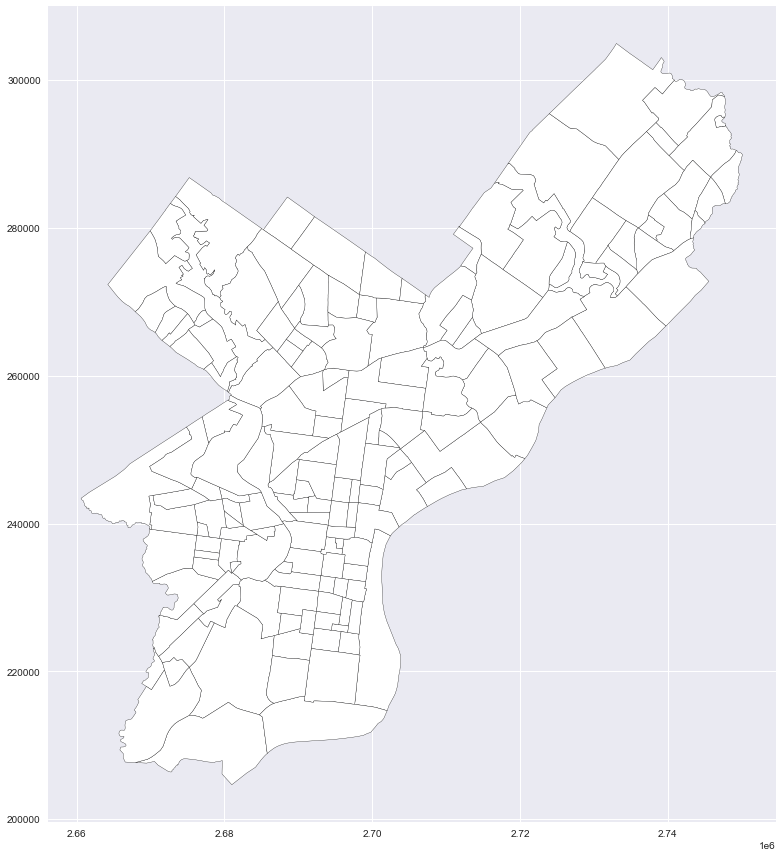

In [179]:
street_map = gpd.read_file("data/geo_shape/Neighborhoods_Philadelphia.shp")
#Download shape file from here. Download all files under folder "Neighborhoods_philadelphia" and keep in the same folder https://github.com/azavea/geo-data
fig,ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.plot(ax = ax,  color = "white", edgecolor='black')

In [8]:
street_map.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


<AxesSubplot:>

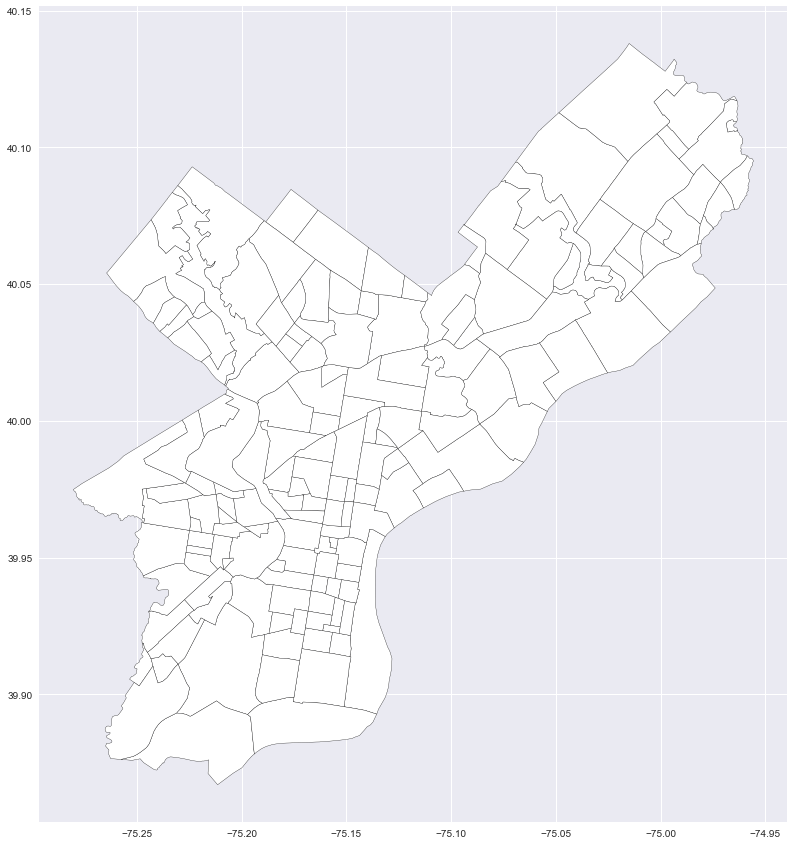

In [9]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, color = "white", edgecolor='black')# converting axis to coordiate with longitude and latitude

<AxesSubplot:>

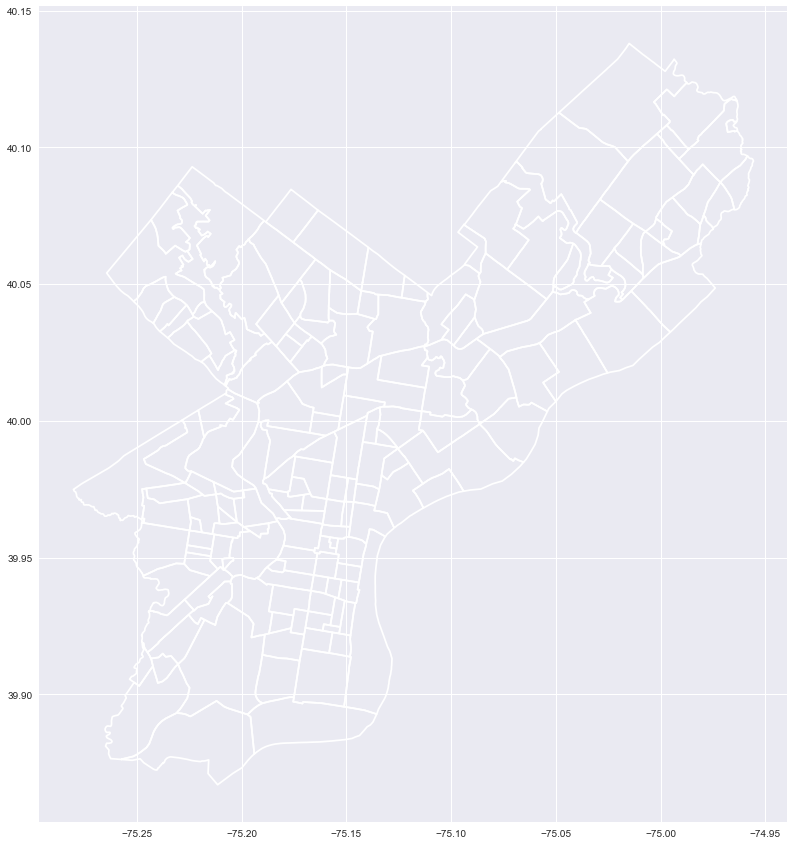

In [24]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).boundary.plot(ax = ax)# plotting only boundary

In [10]:
street_map.to_crs(epsg = 4326).head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."


In [11]:
street_map.total_bounds# exact city boundary

array([2660586.2010556 ,  204650.55486186, 2750109.00494927,
        304965.32339202])

In [12]:
street_map.centroid# center coordinate of the sape

0      POINT (2719422.233 253264.287)
1      POINT (2725947.795 288491.804)
2      POINT (2688745.576 280652.166)
3      POINT (2679098.697 279137.188)
4      POINT (2685458.776 259484.374)
                    ...              
153    POINT (2688489.596 218958.968)
154    POINT (2697705.388 227294.296)
155    POINT (2691305.087 226663.440)
156    POINT (2688805.843 226518.573)
157    POINT (2693761.573 226871.685)
Length: 158, dtype: geometry

### Philly zip file
Source:
https://www.opendataphilly.org/dataset/zip-codes

In [415]:
poly_zip = gpd.read_file("data/zip_shape/Zipcodes_Poly-shp/Zipcodes_Poly.shp")
poly_zip.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045..."
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994..."
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985..."
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970..."
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039..."


In [416]:
poly_zip.dtypes

OBJECTID         int64
CODE            object
COD              int64
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

<AxesSubplot:>

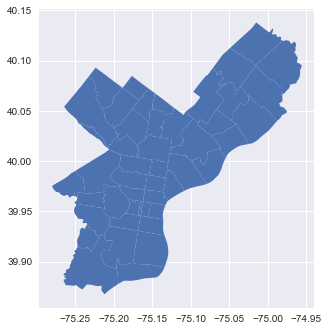

In [ ]:
poly_zip.plot()

   OBJECTID  SEG_ID BORDERTYPE   CODE  F_NAME  ZIP_LEFT  ZIP_RIGHT  \
0         1       0  Hydrology      0    None     88888      19127   
1         2       0       Rail      0    None     19127      19128   
2         3  740724       Road  19149  HOWELL     19149      19149   
3         4       0      Other      0    None     19124      19111   
4         5       0      Other      0    None     19149      19111   

    Shape__Len                                           geometry  
0  6571.228050  LINESTRING (-75.21066 40.01448, -75.21077 40.0...  
1  1945.456939  LINESTRING (-75.24209 40.03773, -75.24189 40.0...  
2   245.700847  LINESTRING (-75.09010 40.03768, -75.09010 40.0...  
3   464.838305  LINESTRING (-75.09134 40.03842, -75.09157 40.0...  
4   207.599133  LINESTRING (-75.08888 40.03819, -75.08907 40.0...  


<AxesSubplot:>

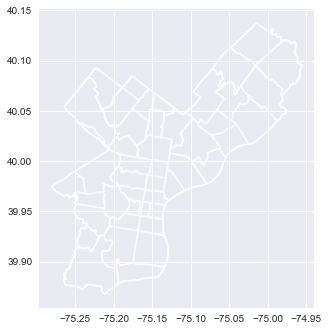

In [414]:
line_zip = gpd.read_file("data/zip_shape/Zipcodes_Arc-shp/e623fad0-e103-46bb-bcd9-8e3e7851214c2020329-1-71i91a.o48wc.shp")
print(line_zip.head())
line_zip.plot()

### Philly shape file on philly vacant lot file combined

In [13]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(philly_points["X"], philly_points["Y"])]
geometry[:3]

In [14]:
geo_df = gpd.GeoDataFrame(philly_points,
                            crs = crs,
                            geometry = geometry)

geo_df.head()

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK,geometry
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67,POINT (-75.17890 39.93451)
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50,POINT (-75.16455 39.98816)
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50,POINT (-75.18048 39.97856)
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00,POINT (-75.18658 40.00685)
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00,POINT (-75.23879 39.95490)


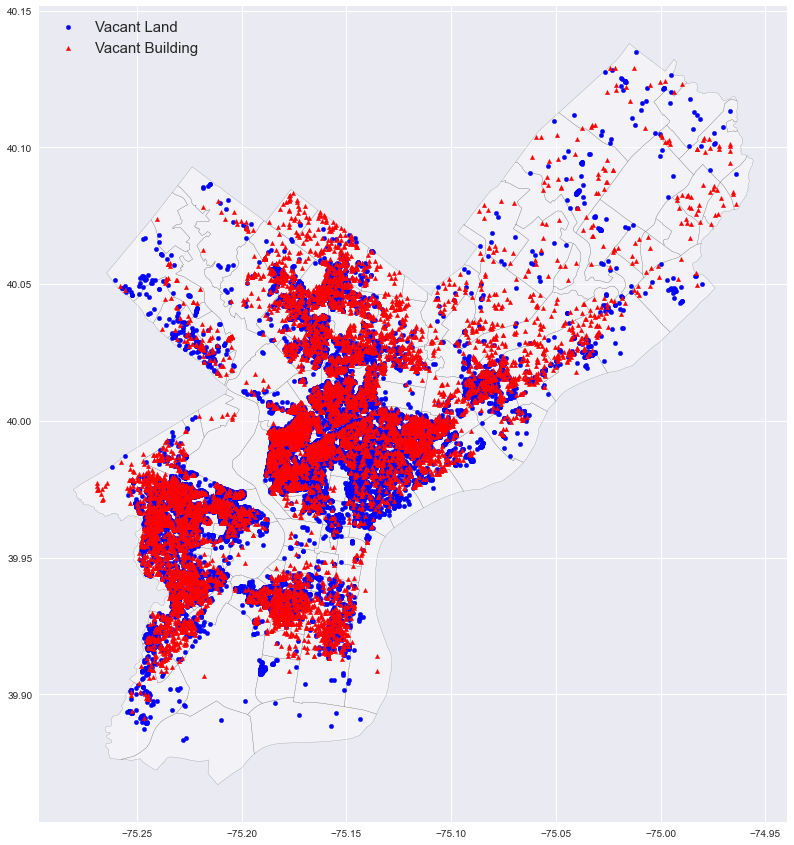

In [15]:
fig, ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
#plt.show()

### Loading Open Street Map File of PA

In [16]:
#download pennsylvania open street map data
#https://download.geofabrik.de/north-america/us/pennsylvania.html
#details of dataset http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf
roads_path = "data/osm/gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')

In [17]:
roads_new = roads.to_crs(epsg = 4326)
street_map_new = street_map.to_crs(epsg = 4326)

In [18]:
street_map_new.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."


In [19]:
roads_new.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,368034,5115,tertiary,Seaport Drive,None,F,0,0,F,F,"LINESTRING (-75.38773 39.82798, -75.38600 39.8..."
1,368041,5113,primary,Industrial Highway,US 13;PA 291,B,0,0,F,F,"LINESTRING (-75.35786 39.84750, -75.35676 39.8..."
2,368043,5115,tertiary,Bullens Lane,None,F,56,0,F,F,"LINESTRING (-75.35060 39.86874, -75.35050 39.8..."
3,368044,5113,primary,Chester Road,PA 320,B,64,1,T,F,"LINESTRING (-75.36147 39.87190, -75.36118 39.8..."
4,418185,5113,primary,East 9th Street,US 13 Business,B,56,0,F,F,"LINESTRING (-75.35941 39.85319, -75.35874 39.8..."


In [20]:
#filtering only for philadelphia shape
roads = gpd.sjoin(roads_new, street_map_new, predicate ='intersects')

In [25]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
235570,12108955,5122,residential,Brunner Street,None,F,0,0,F,F,"LINESTRING (-75.15542 40.01863, -75.15717 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
235571,12108958,5122,residential,Brunner Street,None,F,0,0,F,F,"LINESTRING (-75.15710 40.01773, -75.15856 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
238204,12119360,5122,residential,Gratz Street,None,F,0,0,F,F,"LINESTRING (-75.15635 40.02050, -75.15634 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
239953,12133630,5122,residential,Staub Street,None,B,0,0,F,F,"LINESTRING (-75.15447 40.01708, -75.15510 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
239955,12133635,5122,residential,Staub Street,None,F,0,0,F,F,"LINESTRING (-75.15458 40.01727, -75.15440 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06


In [26]:
roads.shape

(72827, 17)

<AxesSubplot:>

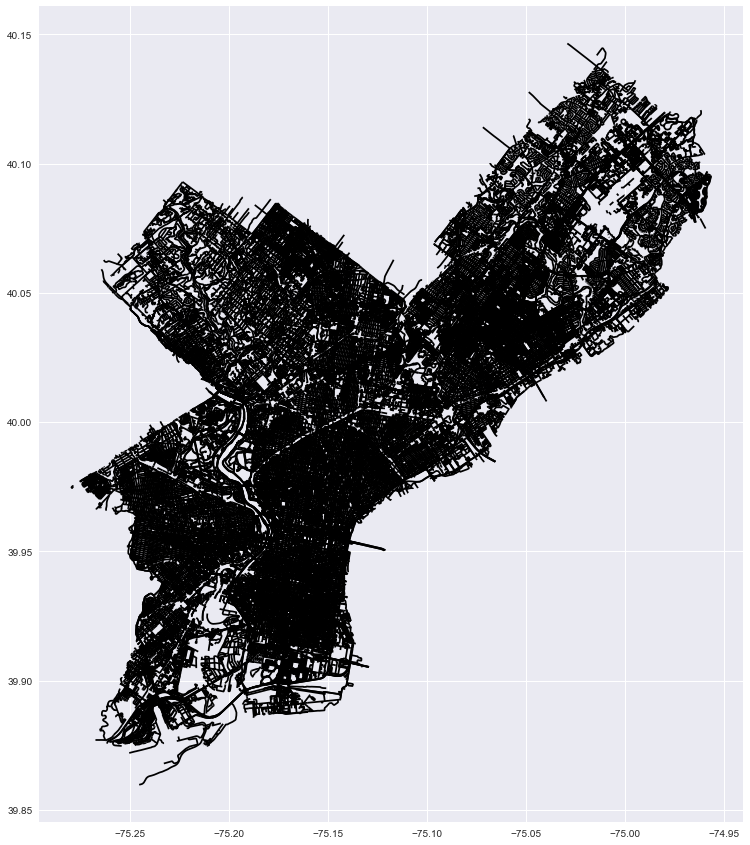

In [30]:
fig, ax = plt.subplots(figsize =(15,15))
roads.plot(ax = ax, edgecolor='black')# plotting all roads

In [21]:
roads.fclass.value_counts()# this shows the type of roads. Most of the roads are  ones thata are used for service, foorway and residential

service           26354
footway           19962
residential       13744
primary            3392
tertiary           2338
secondary          2009
path               1132
trunk               688
motorway_link       649
motorway            625
steps               569
cycleway            351
trunk_link          190
pedestrian          190
unclassified        153
primary_link        150
track               123
secondary_link       87
tertiary_link        62
bridleway            41
track_grade2          5
living_street         5
unknown               4
track_grade5          2
track_grade1          2
Name: fclass, dtype: int64

In [31]:
car_roads = roads[(roads.fclass == 'tertiary') |
                  (roads.fclass == 'tertiary_link') |
                  (roads.fclass == 'secondary') |
                  (roads.fclass == 'secondary_link') |
                  (roads.fclass == 'primary') |
                  (roads.fclass == 'primary_link') |
                  (roads.fclass == 'motorway') |
                  (roads.fclass == 'motorway_linkt')]
                  
car_roads.shape

(8663, 17)

Text(0.5, 1.0, 'Car Roads')

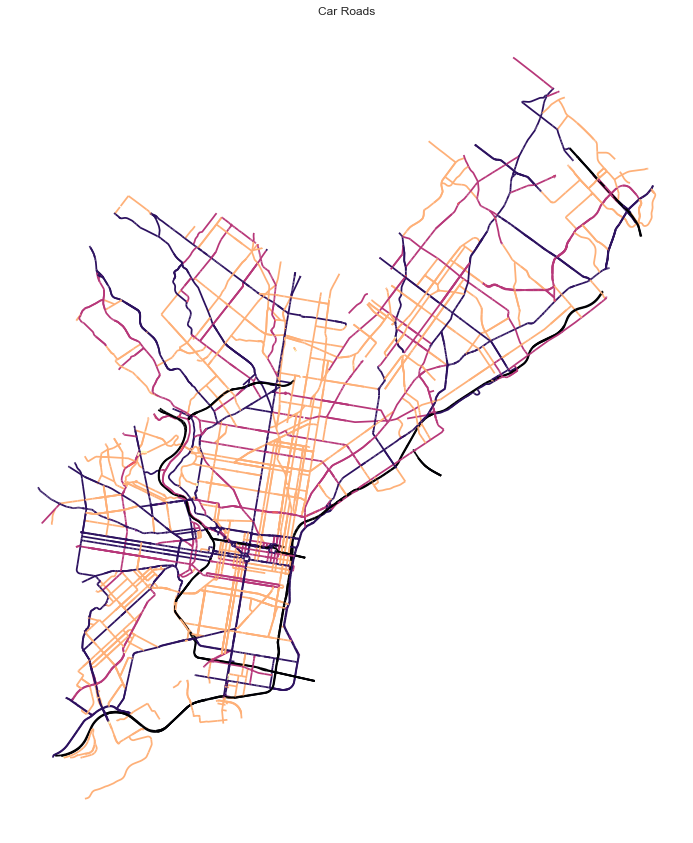

In [36]:
fig, ax = plt.subplots(figsize =(15,15))
car_roads.plot(ax = ax, markersize=0.01, column='fclass',figsize=(5, 5), cmap = 'magma')
plt.axis('off');
plt.title("Car Roads")

Text(0.5, 1.0, 'Main Roads - Philadelphia')

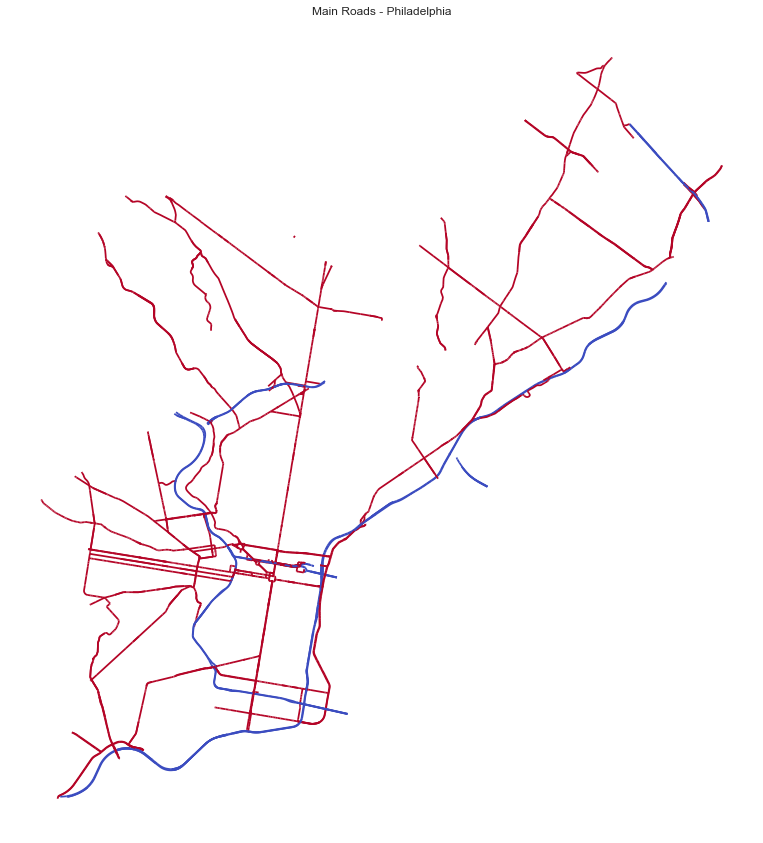

In [40]:
main_roads = car_roads[(car_roads.fclass == 'primary') |
                       (car_roads.fclass == 'motorway')
                      ]

fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
plt.axis('off')
plt.title("Main Roads - Philadelphia")

### Open Street Map File on predicted Vacant lot file

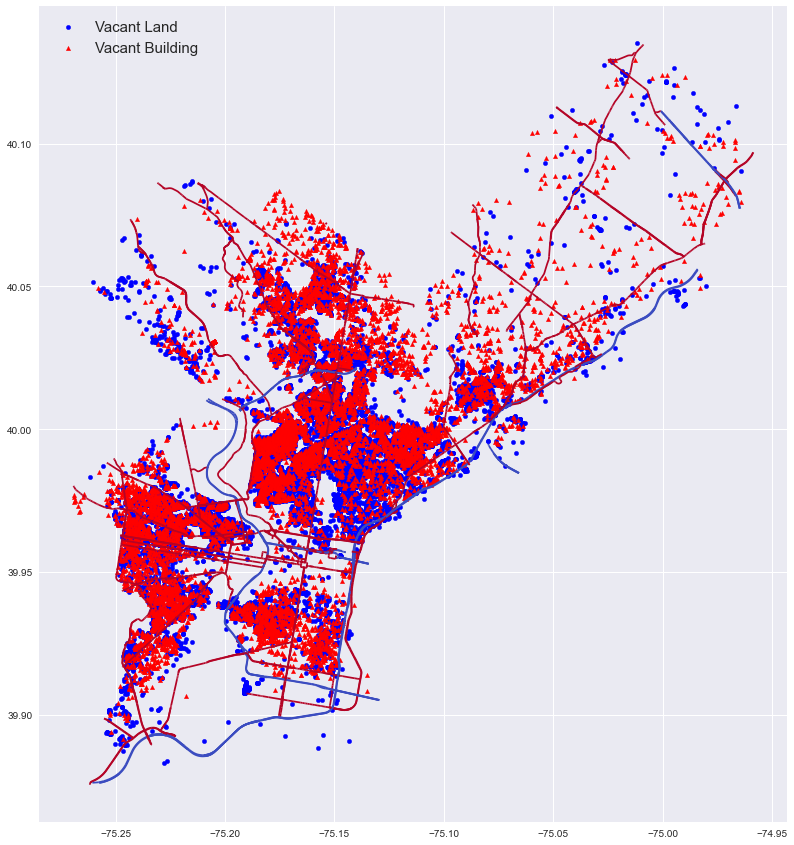

In [41]:
#vacant land and vant building layer on top of main roads in philadelphia
fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})

### Loading Census Data

In [136]:
#details on census and American comunity Survey data https://data.census.gov/cedsci/table
#censusdata.search('acs5', 2015,'concept', 'vacant')# finding 5 year ACS estimates from 2015 with transportation in the concept
#selected data tables from here https://censusreporter.org/profiles/15000US421010176021-block-group-1-philadelphia-pa/
#https://learn.arcgis.com/en/related-concepts/united-states-census-geography.htm
#states > counties > tracts > blockgroups > blocks 
#tracts are  fairly homogenous, when tract is beyond 800 people the tract is split up
#blockgroup contains blocks. Block groups have between 250 and 550 housing units
#census block is the smalest geographic census unit
#Blocks can be bounded by visible features—such as streets—or by invisible boundaries, such as city limits. 
# Census blocks are often the same as ordinary city blocks. Census blocks change every decade.
#print(data.head)
censusdata.search('acs5', 2019,'label', 'age')

[('B01002A_001E',
  'MEDIAN AGE BY SEX (WHITE ALONE)',
  'Estimate!!Median age --!!Total:'),
 ('B01002A_002E',
  'MEDIAN AGE BY SEX (WHITE ALONE)',
  'Estimate!!Median age --!!Male'),
 ('B01002A_003E',
  'MEDIAN AGE BY SEX (WHITE ALONE)',
  'Estimate!!Median age --!!Female'),
 ('B01002B_001E',
  'MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)',
  'Estimate!!Median age --!!Total:'),
 ('B01002B_002E',
  'MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)',
  'Estimate!!Median age --!!Male'),
 ('B01002B_003E',
  'MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)',
  'Estimate!!Median age --!!Female'),
 ('B01002C_001E',
  'MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)',
  'Estimate!!Median age --!!Total:'),
 ('B01002C_002E',
  'MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)',
  'Estimate!!Median age --!!Male'),
 ('B01002C_003E',
  'MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)',
  'Estimate!!Median age --!!Female'),
 ('B01002D_001E',
  'MEDI

### ACS: Occupancy Status

In [17]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25002'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25002_001E  | OCCUPANCY STATUS               | !! Estimate Total                                        | int  
B25002_002E  | OCCUPANCY STATUS               | !! !! Estimate Total Occupied                            | int  
B25002_003E  | OCCUPANCY STATUS               | !! !! Estimate Total Vacant                              | int  
-------------------------------------------------------------------------------------------------------------------


In [134]:
acs_occupancy = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B25002_001E', 'B25002_002E','B25002_003E'])

acs_occupancy.rename(columns = {'B25002_001E': 'total',
                                'B25002_002E': 'occupied',
                                'B25002_003E' : 'vacant'}, inplace = True)

acs_occupancy.to_csv('data/acs/occupancy.csv')
acs_occupancy.head()

,total,occupied,vacant
"Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:980700> block group:1",0,0,0
"Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:002701> block group:3",707,616,91
"Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:2",400,400,0
"Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:3",1451,1340,111
"Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:020500> block group:2",774,668,106


### ACS: Vacancy Type

In [98]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B25004'))# type of vacant

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25004_001E  | VACANCY STATUS                 | !! Estimate Total:                                       | int  
B25004_002E  | VACANCY STATUS                 | !! !! Estimate Total: For rent                           | int  
B25004_003E  | VACANCY STATUS                 | !! !! Estimate Total: Rented, not occupied               | int  
B25004_004E  | VACANCY STATUS                 | !! !! Estimate Total: For sale only                      | int  
B25004_005E  | VACANCY STATUS                 | !! !! Estimate Total: Sold, not occupied                 | int  
B25004_006E  | VACANCY STATUS                 | !! !! Estimate Total: For seasonal, recreational, or occ | int  
B25004_007E  | VACANCY STATUS                 | !! !! Estimate Total: For migrant workers    

In [135]:
acs_vacant_type = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B25004_001E', 'B25004_002E', 'B25004_003E', 'B25004_004E', 'B25004_005E', 'B25004_006E',
                                 'B25004_007E', 'B25004_008E'])

acs_vacant_type.rename(columns = {'B25004_001E': 'total',
                                'B25004_002E':  'for_rent',
                                'B25004_003E' : 'rented_not_occupied',
                                'B25004_004E' : 'for_sale_only',
                                'B25004_005E' : 'sold_not_occupied',
                                'B25004_006E' : 'seasonal_recreational',
                                'B25004_007E' : 'migrant_workers',
                                'B25004_008E' : 'other'}, inplace = True)

acs_vacant_type.to_csv('data/acs/vacant_type.csv')
acs_vacant_type.head()

,total,for_rent,rented_not_occupied,for_sale_only,sold_not_occupied,seasonal_recreational,migrant_workers,other
"Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:980700> block group:1",0,0,0,0,0,0,0,0
"Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:002701> block group:3",91,0,0,48,0,0,0,43
"Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:2",0,0,0,0,0,0,0,0
"Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:3",111,73,0,0,38,0,0,0
"Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:020500> block group:2",106,0,0,0,0,0,0,106


### ACS: Age and Sex

In [143]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B01001'))#age and sex

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total:                                       | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total: Male:                              | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: Under 5 years             | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 5 to 9 years              | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 10 to 14 years            | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 15 to 17 years            | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total: Male: 18 and 19 year

In [144]:
acs_gender = censusdata.download('acs5', 2019,
           censusdata.censusgeo([('state', '42'),
                                 ('county', '101'), # philadelphia county
                                 ('block group', '*')]),
                                 ['B01001_001E', 'B01001_002E', 'B01001_026E'])

acs_gender.rename(columns = {'B01001_001E': 'total',
                             'B01001_002E': 'Male',
                             'B01001_026E': 'Female',}, inplace = True) #include age here, group by under 18, 18-64, 65 and over

acs_gender.to_csv('data/acs/gender.csv')
acs_gender.head()

,total,Male,Female
"Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:980700> block group:1",0,0,0
"Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:002701> block group:3",1955,1023,932
"Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:2",976,541,435
"Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:033701> block group:3",3859,1969,1890
"Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania: Summary level: 150, state:42> county:101> tract:020500> block group:2",1017,553,464


### ACS: Other Important Datasets

In [75]:
censusdata.printtable(censusdata.censustable('acs5', 2019, 'B03002'))#race

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B03002_001E  | HISPANIC OR LATINO ORIGIN BY R | !! Estimate Total                                        | int  
B03002_002E  | HISPANIC OR LATINO ORIGIN BY R | !! !! Estimate Total Not Hispanic or Latino              | int  
B03002_003E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino White alo | int  
B03002_004E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino Black or  | int  
B03002_005E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino American  | int  
B03002_006E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latino Asian alo | int  
B03002_007E  | HISPANIC OR LATINO ORIGIN BY R | !! !! !! Estimate Total Not Hispanic or Latin

In [76]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B17001'))#poverty stattus

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B17001_001E  | POVERTY STATUS IN THE PAST 12  | !! Estimate Total                                        | int  
B17001_002E  | POVERTY STATUS IN THE PAST 12  | !! !! Estimate Total Income in the past 12 months below  | int  
B17001_003E  | POVERTY STATUS IN THE PAST 12  | !! !! !! Estimate Total Income in the past 12 months bel | int  
B17001_004E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_005E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_006E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past 12 months  | int  
B17001_007E  | POVERTY STATUS IN THE PAST 12  | !! !! !! !! Estimate Total Income in the past

In [77]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B19001'))#household income

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19001_001E  | HOUSEHOLD INCOME IN THE PAST 1 | !! Estimate Total                                        | int  
B19001_002E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total Less than $10,000                   | int  
B19001_003E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $10,000 to $14,999                  | int  
B19001_004E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $15,000 to $19,999                  | int  
B19001_005E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $20,000 to $24,999                  | int  
B19001_006E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $25,000 to $29,999                  | int  
B19001_007E  | HOUSEHOLD INCOME IN THE PAST 1 | !! !! Estimate Total $30,000 to $34,999      

In [78]:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B15002'))#education

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15002_001E  | SEX BY EDUCATIONAL ATTAINMENT  | !! Estimate Total                                        | int  
B15002_002E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! Estimate Total Male                                | int  
B15002_003E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male No schooling completed      | int  
B15002_004E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male Nursery to 4th grade        | int  
B15002_005E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 5th and 6th grade           | int  
B15002_006E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 7th and 8th grade           | int  
B15002_007E  | SEX BY EDUCATIONAL ATTAINMENT  | !! !! !! Estimate Total Male 9th grade       

In [59]:
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)#printing name of state and code in the dataset
print(states['Pennsylvania']) # pennsylvania is code 42

Summary level: 040, state:42


In [23]:
counties = censusdata.geographies(censusdata.censusgeo([('state', '42'), ('county', '*')]), 'acs5', 2015)
counties # finidng all counties in PA

{'Somerset County, Pennsylvania': censusgeo((('state', '42'), ('county', '111'))),
 'Delaware County, Pennsylvania': censusgeo((('state', '42'), ('county', '045'))),
 'Cameron County, Pennsylvania': censusgeo((('state', '42'), ('county', '023'))),
 'Bucks County, Pennsylvania': censusgeo((('state', '42'), ('county', '017'))),
 'Lehigh County, Pennsylvania': censusgeo((('state', '42'), ('county', '077'))),
 'Clarion County, Pennsylvania': censusgeo((('state', '42'), ('county', '031'))),
 'Greene County, Pennsylvania': censusgeo((('state', '42'), ('county', '059'))),
 'Luzerne County, Pennsylvania': censusgeo((('state', '42'), ('county', '079'))),
 'Columbia County, Pennsylvania': censusgeo((('state', '42'), ('county', '037'))),
 'Jefferson County, Pennsylvania': censusgeo((('state', '42'), ('county', '065'))),
 'Perry County, Pennsylvania': censusgeo((('state', '42'), ('county', '099'))),
 'Sullivan County, Pennsylvania': censusgeo((('state', '42'), ('county', '113'))),
 'Dauphin County

In [35]:
censusdata.geographies(censusdata.censusgeo([('state', '42'),('county', '101')]), 'acs5', 2015)# selecting philadelphia county only

{'Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101')))}

In [81]:
censusdata.geographies(censusdata.censusgeo([('state', '42'),('county', '101'), ('block group', '*')]), 'acs5', 2019)# all block group in philadelphia county


{'Block Group 1, Census Tract 9807, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '980700'), ('block group', '1'))),
 'Block Group 3, Census Tract 27.01, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '002701'), ('block group', '3'))),
 'Block Group 2, Census Tract 337.01, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '033701'), ('block group', '2'))),
 'Block Group 3, Census Tract 337.01, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '033701'), ('block group', '3'))),
 'Block Group 2, Census Tract 205, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '020500'), ('block group', '2'))),
 'Block Group 1, Census Tract 218, Philadelphia County, Pennsylvania': censusgeo((('state', '42'), ('county', '101'), ('tract', '021800'), ('block group', '1'))),
 'Block Group

### Philly crime data

In [208]:
#Source: https://metadata.phila.gov/#home/datasetdetails/5543868920583086178c4f8e/representationdetails/570e7621c03327dc14f4b68d/
crime = pd.read_csv('data/city/crime.csv')

In [209]:
crime.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'dc_dist', 'psa',
       'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour_',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng'],
      dtype='object')

In [210]:
crime.head()

,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,107,6,1,2013-05-28 09:43:00,2013-05-28,09:43:00,9.0,201306025636,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
1,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,108,6,1,2013-11-26 10:24:00,2013-11-26,10:24:00,10.0,201306061456,N 02ND ST / SPRING GARDEN ST,300,Robbery No Firearm,-75.141441,39.960712,39.960712,-75.141441
2,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,109,6,1,2013-12-16 13:10:00,2013-12-16,13:10:00,13.0,201306064336,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
3,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441
4,0101000020E6100000FB79CF5866C552C0942E81847604...,0101000020110F0000A78BF98174E25FC145F74595D894...,111,2,1,2011-09-08 11:27:00,2011-09-08,11:27:00,11.0,201102059237,5900 BLOCK LORETTO AVE,500,Burglary Residential,-75.084372,40.034867,40.034867,-75.084372


In [211]:
crime.isna().sum()

the_geom                 282
the_geom_webmercator     282
objectid                   0
dc_dist                    0
psa                      644
dispatch_date_time         0
dispatch_date              0
dispatch_time              0
hour_                     28
dc_key                     0
location_block            55
ucr_general                0
text_general_code          0
point_x                 1423
point_y                 1423
lat                      282
lng                      282
dtype: int64

In [212]:
crime.dtypes

the_geom                 object
the_geom_webmercator     object
objectid                  int64
dc_dist                   int64
psa                      object
dispatch_date_time       object
dispatch_date            object
dispatch_time            object
hour_                   float64
dc_key                    int64
location_block           object
ucr_general               int64
text_general_code        object
point_x                 float64
point_y                 float64
lat                     float64
lng                     float64
dtype: object

In [213]:
#dropping null values of lat  and lng values
crime.dropna(subset=['lat'], inplace=True)
crime.dropna(subset=['lng'], inplace=True)

In [214]:
#dropping null values of  point_x and point_y values
crime.dropna(subset=['point_x'], inplace=True)
crime.dropna(subset=['point_y'], inplace=True)

In [215]:
crime['dispatch_date'] = pd.to_datetime(crime['dispatch_date'])

In [233]:
crime = crime.loc[crime["dispatch_date"] >= "2014-01-01"].reset_index(drop=True)
crime.shape

(1258747, 18)

In [234]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258747 entries, 0 to 1258746
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   the_geom              1258747 non-null  object        
 1   the_geom_webmercator  1258747 non-null  object        
 2   objectid              1258747 non-null  int64         
 3   dc_dist               1258747 non-null  int64         
 4   psa                   1258577 non-null  object        
 5   dispatch_date_time    1258747 non-null  object        
 6   dispatch_date         1258747 non-null  datetime64[ns]
 7   dispatch_time         1258747 non-null  object        
 8   hour_                 1258742 non-null  float64       
 9   dc_key                1258747 non-null  int64         
 10  location_block        1258740 non-null  object        
 11  ucr_general           1258747 non-null  int64         
 12  text_general_code     1258747 non-null  ob

In [250]:
print(crime['point_x'].min())
print(crime['lng'].min())

-81.58137853
-81.58137853


In [251]:
print(crime['point_x'].max())
print(crime['lng'].max())

2725830.9416288
-74.95753244


In [252]:
print(crime['point_y'].max())
print(crime['lat'].max())

278069.04403542
40.13771285


In [253]:
print(crime['point_y'].min())
print(crime['lat'].min())

-3975202.88585439
28.41954829


<AxesSubplot:>

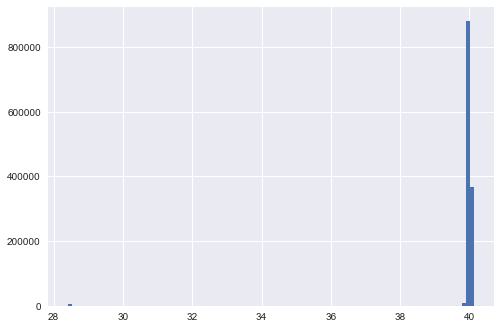

In [278]:
crime['lat'].hist(bins = 100) # histogram shows the irregularies in lat data

In [282]:
print(crime.loc[crime['lat']>30].shape)
print(crime.loc[crime['lat']<30].shape)

(1253757, 18)
(4990, 18)


<AxesSubplot:>

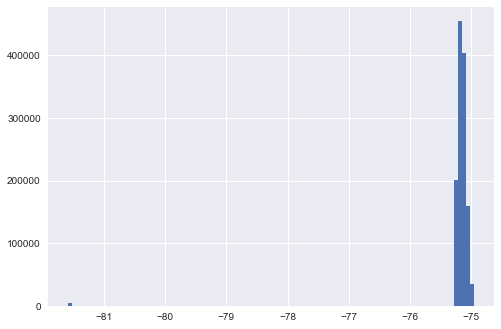

In [277]:
crime['lng'].hist(bins= 100)# historgram shows the irregularities in lng data

In [283]:
print(crime.loc[crime['lng']<-81].shape)
print(crime.loc[crime['lng']>-81].shape)

(4990, 18)
(1253757, 18)


In [285]:
crime = crime.loc[crime['lng']>-81].reset_index(drop=True)
crime.shape

(1253757, 18)

<AxesSubplot:>

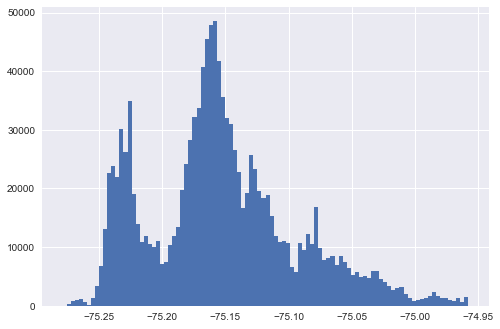

In [289]:
crime['lng'].hist(bins= 100)

<AxesSubplot:>

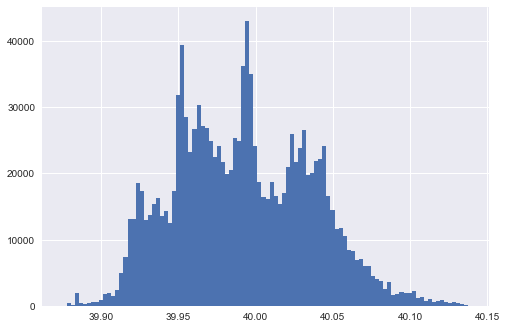

In [290]:
crime['lat'].hist(bins= 100)

In [291]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(crime["lng"], crime["lat"])]
geometry[:3]

In [292]:
crime_df = gpd.GeoDataFrame(crime,
                            crs = crs,
                            geometry = geometry)

crime_df.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,the_geom,the_geom_webmercator,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,geometry
0,0101000020E6100000EA77405D0DC952C016F8ED98F8FA...,0101000020110F000080BB90BAA8E85FC1EC88B8A8528A...,110,6,1,2014-01-27 13:12:00,2014-01-27,13:12:00,13.0,201406003790,N 02ND ST / SPRING GARDEN ST,600,Thefts,-75.141441,39.960712,39.960712,-75.141441,POINT (-75.14144 39.96071)
1,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,117,12,1,2018-01-06 10:56:00,2018-01-06,10:56:00,10.0,201812001185,6600 BLOCK ESSINGTON AVE,600,Thefts,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)
2,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,118,12,1,2018-06-21 22:57:00,2018-06-21,22:57:00,22.0,201812045738,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)
3,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,119,12,1,2018-07-23 01:58:00,2018-07-23,01:58:00,1.0,201812053606,6600 BLOCK ESSINGTON AVE,300,Robbery No Firearm,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)
4,0101000020E61000002FD31F2F1ECE52C07129BE0C0CF5...,0101000020110F0000401FFA8143F15FC1160AD2D2C283...,120,12,1,2015-01-15 08:58:00,2015-01-15,08:58:00,8.0,201512003444,6600 BLOCK ESSINGTON AVE,500,Burglary Non-Residential,-75.220592,39.914430,39.914430,-75.220592,POINT (-75.22059 39.91443)


In [293]:
#crime_df = crime_df.to_crs(epsg = 4326)

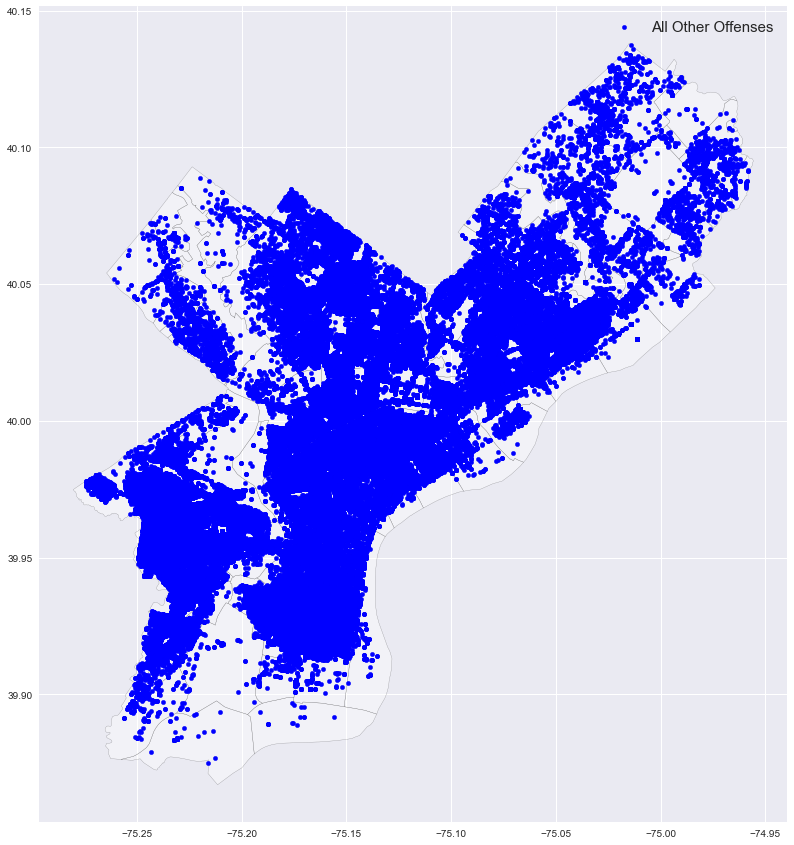

In [295]:
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
crime_df[crime_df['text_general_code'] == 'All Other Offenses'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "All Other Offenses")
#crime_df[crime_df['text_general_code'] == 'Thefts'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Thefts")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
plt.show()

In [301]:
crime_df['text_general_code'].value_counts()

All Other Offenses                         224335
Other Assaults                             186903
Thefts                                     182815
Vandalism/Criminal Mischief                118236
Theft from Vehicle                         105101
Fraud                                       86706
Narcotic / Drug Law Violations              64565
Aggravated Assault No Firearm               42783
Burglary Residential                        42387
Robbery No Firearm                          26023
Motor Vehicle Theft                         24938
DRIVING UNDER THE INFLUENCE                 23141
Aggravated Assault Firearm                  21328
Robbery Firearm                             19700
Weapon Violations                           18735
Burglary Non-Residential                    13597
Disorderly Conduct                          10987
Rape                                         8517
Other Sex Offenses (Not Commercialized)      7382
Prostitution and Commercialized Vice         6089


### Property Tax Delinquency 
An account is delinquent when Real Estate Tax is still unpaid on January 1 the following year the tax was due

Date Range 1972 - 2018, Updated Monthly

In [303]:
#https://metadata.phila.gov/#home/datasetdetails/57d9643afab162fe2708224e/representationdetails/57d9643cfab162fe27082252/ 

tax = pd.read_csv('data/city/real_estate_tax_delinquencies.csv')

In [304]:
tax.head()

,objectid,opa_number,street_address,zip_code,zip_4,unit_type,unit_num,owner,co_owner,principal_due,...,oldest_bankrupt_year,principal_sum_bankrupt_years,total_amount_bankrupt_years,sheriff_sale,liens_sold_1990s,liens_sold_2015,assessment_under_appeal,year_month,lat,lng
0,2556493,493169300.0,6045 N CAMAC ST,19141.0,3227.0,NaN,NaN,WILLIAMS JACQUELINE,WILLIAMS JACQUELINE,12200.18,...,NaN,NaN,NaN,N,False,N,False,202111,-75.140099,40.045081
1,2556494,493179100.0,5620 N CAMAC ST,19141.0,4106.0,NaN,NaN,RAY MATTIE E,RAY MATTIE E,-0.05,...,NaN,NaN,NaN,N,False,N,False,202111,-75.141930,40.039007
2,2556495,493180700.0,5714 N CAMAC ST,19141.0,4108.0,NaN,NaN,TOMLIN PAULA,TOMLIN PAULA,895.87,...,NaN,NaN,NaN,N,False,N,False,202111,-75.141727,40.039940
3,2556496,493183600.0,5812 N CAMAC ST,19141.0,4123.0,NaN,NaN,BATTS PRINCETON B,BATTS PRINCETON B,4536.94,...,NaN,NaN,NaN,N,False,N,False,202111,-75.141395,40.041404
4,2556497,223166200.0,420 GLEN ECHO RD,19119.0,2914.0,NaN,NaN,WHITE CLARENCE,WHITE CLARENCE,4224.60,...,NaN,NaN,NaN,N,False,N,False,202111,-75.195309,40.051563


In [305]:
tax.columns

Index(['objectid', 'opa_number', 'street_address', 'zip_code', 'zip_4',
       'unit_type', 'unit_num', 'owner', 'co_owner', 'principal_due',
       'penalty_due', 'interest_due', 'other_charges_due', 'total_due',
       'is_actionable', 'payment_agreement', 'num_years_owed',
       'most_recent_year_owed', 'oldest_year_owed', 'most_recent_payment_date',
       'year_of_last_assessment', 'total_assessment', 'taxable_assessment',
       'mailing_address', 'mailing_city', 'mailing_state', 'mailing_zip',
       'return_mail', 'building_code', 'detail_building_description',
       'general_building_description', 'building_category',
       'coll_agency_num_years', 'coll_agency_most_recent_year',
       'coll_agency_oldest_year', 'coll_agency_principal_owed',
       'coll_agency_total_owed', 'exempt_abatement_assessment',
       'homestead_value', 'net_tax_value_after_homestead', 'agreement_agency',
       'sequestration_enforcement', 'bankruptcy', 'years_in_bankruptcy',
       'most_recent

In [306]:
tax.dtypes

objectid                           int64
opa_number                       float64
street_address                    object
zip_code                         float64
zip_4                            float64
unit_type                         object
unit_num                          object
owner                             object
co_owner                          object
principal_due                    float64
penalty_due                      float64
interest_due                     float64
other_charges_due                float64
total_due                        float64
is_actionable                       bool
payment_agreement                   bool
num_years_owed                     int64
most_recent_year_owed              int64
oldest_year_owed                   int64
most_recent_payment_date          object
year_of_last_assessment          float64
total_assessment                 float64
taxable_assessment               float64
mailing_address                   object
mailing_city    

In [307]:
tax.T

,0,1,2,3,4,5,6,7,8,9,...,72708,72709,72710,72711,72712,72713,72714,72715,72716,72717
objectid,2556493,2556494,2556495,2556496,2556497,2556498,2556499,2556500,2556501,2556502,...,2628136,2628137,2628138,2628139,2628140,2628141,2628142,2628143,2628144,2628145
opa_number,493169300.0,493179100.0,493180700.0,493183600.0,223166200.0,882929915.0,231024100.0,231042300.0,871569460.0,442203100.0,...,462127900.0,463006800.0,463008600.0,463012500.0,406265800.0,406297800.0,406299300.0,406313100.0,406317000.0,406349800.0
street_address,6045 N CAMAC ST,5620 N CAMAC ST,5714 N CAMAC ST,5812 N CAMAC ST,420 GLEN ECHO RD,2312 DUNCAN ST,4321 MELROSE ST,4540 MILNOR ST,4920 LANCASTER AVE,923 N FALLON ST,...,5217 BALTIMORE AVE,5638 LARCHWOOD AVE,5720 LARCHWOOD AVE,5541 HAZEL AVE,6434 GARMAN ST,6918 DICKS AVE,7009 W PASSYUNK AVE,6737 GUYER AVE,6853 GUYER AVE,6716 DOREL ST
zip_code,19141.0,19141.0,19141.0,19141.0,19119.0,19124.0,19124.0,19124.0,19131.0,19131.0,...,19143.0,19143.0,19143.0,19143.0,19142.0,19142.0,19142.0,19142.0,19142.0,19142.0
zip_4,3227.0,4106.0,4108.0,4123.0,2914.0,4110.0,4100.0,4120.0,4519.0,5120.0,...,2622.0,1909.0,1912.0,1905.0,3023.0,2517.0,1713.0,2610.0,2518.0,2607.0
unit_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,WILLIAMS JACQUELINE,RAY MATTIE E,TOMLIN PAULA,BATTS PRINCETON B,WHITE CLARENCE,WHITE DIAMOND ATHLETIC ASSN,HOPWOOD WILLIAM D,KARAS HELEN,MICHAEL EARL DAVIS JR IRREVOCA,SMITH FRANK,...,WHITING WARNER H,SHEFFIELD ANITA,WILLIAMS DORIS,PHILSON JANICE,SMITH DAVID A,CAO SON THANH,MCMICHAEL RICHARD,COPPOLA JOHN,JEAN-LOUIS PATRICIA,HABIL HOUSSEINI
co_owner,WILLIAMS JACQUELINE,RAY MATTIE E,TOMLIN PAULA,BATTS PRINCETON B,WHITE CLARENCE,WHITE DIAMOND ATHLETIC ASSN,HOPWOOD WILLIAM D,KARAS HELEN,MICHAEL EARL DAVIS JR IRREVOCABLE TRUST,SMITH FRANK,...,WHITING WARNER H,SHEFFIELD ANITA,WILLIAMS DORIS,PHILSON JANICE,SMITH DAVID A,CAO SON THANH,MCMICHAEL RICHARD,COPPOLA JOHN,JEAN-LOUIS PATRICIA,HABIL HOUSSEINI
principal_due,12200.18,-0.05,895.87,4536.94,4224.6,1068.0,1493.6,21.92,1054.91,2009.47,...,1758.15,1377.13,99.69,5869.57,4740.34,71.34,1542.58,2504.38,4079.25,2301.27


In [313]:
tax.isna().sum()

objectid                             0
opa_number                           3
street_address                      10
zip_code                            59
zip_4                             3102
unit_type                        71339
unit_num                         71339
owner                                2
co_owner                            98
principal_due                        0
penalty_due                          0
interest_due                         0
other_charges_due                    0
total_due                            0
is_actionable                        0
payment_agreement                    0
num_years_owed                       0
most_recent_year_owed                0
oldest_year_owed                     0
most_recent_payment_date          4920
year_of_last_assessment           1482
total_assessment                  1482
taxable_assessment                1482
mailing_address                  46023
mailing_city                     46022
mailing_state            

In [315]:
tax.shape

(72718, 55)

In [316]:
tax.isna().sum()/tax.shape[0] # remove mailing_address, mailing_city, unit_type, unit_num, mailing_state, mailing_zip, 
# remove return_mail, coll_agency_most_recent_year, coll_agency_oldest_year, agreement_agency, years_in_bankruptcy , 
# remove most_recent_bankrupt_year, oldest_bankrupt_year, principal_sum_bankrupt_years, total_amount_bankrupt_years

objectid                         0.000000
opa_number                       0.000041
street_address                   0.000138
zip_code                         0.000811
zip_4                            0.042658
unit_type                        0.981036
unit_num                         0.981036
owner                            0.000028
co_owner                         0.001348
principal_due                    0.000000
penalty_due                      0.000000
interest_due                     0.000000
other_charges_due                0.000000
total_due                        0.000000
is_actionable                    0.000000
payment_agreement                0.000000
num_years_owed                   0.000000
most_recent_year_owed            0.000000
oldest_year_owed                 0.000000
most_recent_payment_date         0.067659
year_of_last_assessment          0.020380
total_assessment                 0.020380
taxable_assessment               0.020380
mailing_address                  0

In [317]:
tax.drop(['mailing_address', 'mailing_city', 'unit_type', 'unit_num', 'mailing_state', 'mailing_zip', 
        'return_mail', 'coll_agency_most_recent_year', 'coll_agency_oldest_year', 'agreement_agency', 'years_in_bankruptcy' , 
        'most_recent_bankrupt_year', 'oldest_bankrupt_year', 'principal_sum_bankrupt_years', 'total_amount_bankrupt_years'], 
        axis=1, inplace=True) # removing columns thta have high null values


In [318]:
tax.columns

Index(['objectid', 'opa_number', 'street_address', 'zip_code', 'zip_4',
       'owner', 'co_owner', 'principal_due', 'penalty_due', 'interest_due',
       'other_charges_due', 'total_due', 'is_actionable', 'payment_agreement',
       'num_years_owed', 'most_recent_year_owed', 'oldest_year_owed',
       'most_recent_payment_date', 'year_of_last_assessment',
       'total_assessment', 'taxable_assessment', 'building_code',
       'detail_building_description', 'general_building_description',
       'building_category', 'coll_agency_num_years',
       'coll_agency_principal_owed', 'coll_agency_total_owed',
       'exempt_abatement_assessment', 'homestead_value',
       'net_tax_value_after_homestead', 'sequestration_enforcement',
       'bankruptcy', 'sheriff_sale', 'liens_sold_1990s', 'liens_sold_2015',
       'assessment_under_appeal', 'year_month', 'lat', 'lng'],
      dtype='object')

In [321]:
(tax.isna().sum()/tax.shape[0]).sort_values(ascending=False)

most_recent_payment_date         0.067659
zip_4                            0.042658
building_category                0.020449
general_building_description     0.020449
detail_building_description      0.020449
building_code                    0.020408
taxable_assessment               0.020380
net_tax_value_after_homestead    0.020380
homestead_value                  0.020380
exempt_abatement_assessment      0.020380
total_assessment                 0.020380
year_of_last_assessment          0.020380
lat                              0.002654
lng                              0.002654
co_owner                         0.001348
zip_code                         0.000811
street_address                   0.000138
opa_number                       0.000041
owner                            0.000028
num_years_owed                   0.000000
year_month                       0.000000
assessment_under_appeal          0.000000
liens_sold_2015                  0.000000
liens_sold_1990s                 0

In [325]:
tax.shape

(72718, 40)

In [326]:
tax.columns

Index(['objectid', 'opa_number', 'street_address', 'zip_code', 'zip_4',
       'owner', 'co_owner', 'principal_due', 'penalty_due', 'interest_due',
       'other_charges_due', 'total_due', 'is_actionable', 'payment_agreement',
       'num_years_owed', 'most_recent_year_owed', 'oldest_year_owed',
       'most_recent_payment_date', 'year_of_last_assessment',
       'total_assessment', 'taxable_assessment', 'building_code',
       'detail_building_description', 'general_building_description',
       'building_category', 'coll_agency_num_years',
       'coll_agency_principal_owed', 'coll_agency_total_owed',
       'exempt_abatement_assessment', 'homestead_value',
       'net_tax_value_after_homestead', 'sequestration_enforcement',
       'bankruptcy', 'sheriff_sale', 'liens_sold_1990s', 'liens_sold_2015',
       'assessment_under_appeal', 'year_month', 'lat', 'lng'],
      dtype='object')

In [329]:
print(tax['lat'].min())
print(tax['lat'].max())

-75.27396176893846
-74.9593407520959


In [330]:
print(tax['lng'].min())
print(tax['lng'].max())

39.88640598393346
40.13621377256551


In [343]:
tax.dropna(subset=['lat'], inplace=True)
tax.dropna(subset=['lng'], inplace=True)

In [337]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(tax["lat"], tax["lng"])]
tax = gpd.GeoDataFrame(tax,
                        crs = crs,
                        geometry = geometry)

tax.head()

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,objectid,opa_number,street_address,zip_code,zip_4,owner,co_owner,principal_due,penalty_due,interest_due,...,sequestration_enforcement,bankruptcy,sheriff_sale,liens_sold_1990s,liens_sold_2015,assessment_under_appeal,year_month,lat,lng,geometry
0,2556493,493169300.0,6045 N CAMAC ST,19141.0,3227.0,WILLIAMS JACQUELINE,WILLIAMS JACQUELINE,12200.18,1110.17,14261.97,...,False,False,N,False,N,False,202111,-75.140099,40.045081,POINT (-75.14010 40.04508)
1,2556494,493179100.0,5620 N CAMAC ST,19141.0,4106.0,RAY MATTIE E,RAY MATTIE E,-0.05,0.00,41.05,...,False,False,N,False,N,False,202111,-75.141930,40.039007,POINT (-75.14193 40.03901)
2,2556495,493180700.0,5714 N CAMAC ST,19141.0,4108.0,TOMLIN PAULA,TOMLIN PAULA,895.87,0.00,120.94,...,False,False,N,False,N,False,202111,-75.141727,40.039940,POINT (-75.14173 40.03994)
3,2556496,493183600.0,5812 N CAMAC ST,19141.0,4123.0,BATTS PRINCETON B,BATTS PRINCETON B,4536.94,283.14,1161.05,...,False,False,N,False,N,False,202111,-75.141395,40.041404,POINT (-75.14140 40.04140)
4,2556497,223166200.0,420 GLEN ECHO RD,19119.0,2914.0,WHITE CLARENCE,WHITE CLARENCE,4224.60,0.00,570.32,...,False,False,N,False,N,False,202111,-75.195309,40.051563,POINT (-75.19531 40.05156)


<AxesSubplot:>

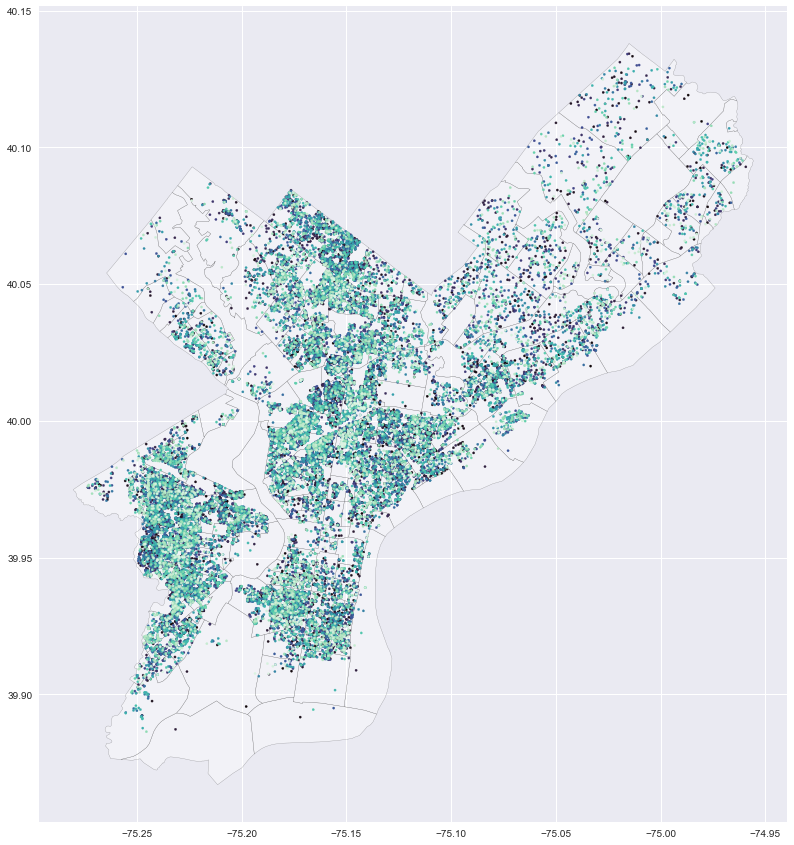

In [426]:
fig, ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
tax[tax['principal_due'] > 2000].plot(ax = ax, cmap = 'mako',legend=True, markersize = 5)#principal that is more than 2000
#plt.legend(prop = {'size' : 15})
#plt.show()

In [360]:
tax.describe().T

,count,mean,std,min,25%,50%,75%,max
objectid,72525.0,2.592829e+06,2.098687e+04,2.556371e+06,2.574662e+06,2.592829e+06,2.611000e+06,2.629184e+06
opa_number,72525.0,3.735889e+08,2.357474e+08,1.100080e+07,1.810721e+08,3.640166e+08,5.021726e+08,8.888007e+08
zip_code,72479.0,1.911504e+04,6.070185e+02,1.000000e+00,1.912800e+04,1.913500e+04,1.914300e+04,1.919200e+04
zip_4,69616.0,2.969683e+03,1.271406e+03,3.000000e+00,1.907000e+03,2.908000e+03,3.920000e+03,7.711000e+03
principal_due,72525.0,3.170896e+03,1.031891e+04,-1.741060e+03,2.456400e+02,1.197030e+03,3.363210e+03,1.174312e+06
penalty_due,72525.0,2.143030e+02,5.637250e+02,-1.089500e+02,0.000000e+00,5.749000e+01,2.477300e+02,5.273024e+04
interest_due,72525.0,1.752588e+03,4.424587e+03,-4.703100e+02,7.841000e+01,2.664700e+02,1.245950e+03,1.307921e+05
other_charges_due,72525.0,7.366745e+02,1.324276e+03,-4.526000e+01,0.000000e+00,2.747300e+02,9.641100e+02,5.252586e+04
total_due,72525.0,5.875430e+03,1.486095e+04,1.000000e-02,4.627300e+02,2.021930e+03,6.237140e+03,1.391257e+06
num_years_owed,72525.0,6.231134e+00,8.224082e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,4.500000e+01


In [382]:
tax.isna().sum()

objectid                            0
opa_number                          0
street_address                      0
zip_code                           46
zip_4                            2909
owner                               1
co_owner                           35
principal_due                       0
penalty_due                         0
interest_due                        0
other_charges_due                   0
total_due                           0
is_actionable                       0
payment_agreement                   0
num_years_owed                      0
most_recent_year_owed               0
oldest_year_owed                    0
most_recent_payment_date         4793
year_of_last_assessment          1313
total_assessment                 1313
taxable_assessment               1313
building_code                    1314
detail_building_description      1316
general_building_description     1316
building_category                1316
coll_agency_num_years               0
coll_agency_

In [409]:
tax.dropna(subset=['zip_code'], inplace=True)# dropping null values zip code
tax['zip_code'] = tax['zip_code'].astype(int).astype(str) #turning number to integer then to object

In [412]:
tax.dtypes

objectid                            int64
opa_number                        float64
street_address                     object
zip_code                           object
zip_4                             float64
owner                              object
co_owner                           object
principal_due                     float64
penalty_due                       float64
interest_due                      float64
other_charges_due                 float64
total_due                         float64
is_actionable                        bool
payment_agreement                    bool
num_years_owed                      int64
most_recent_year_owed               int64
oldest_year_owed                    int64
most_recent_payment_date           object
year_of_last_assessment           float64
total_assessment                  float64
taxable_assessment                float64
building_code                      object
detail_building_description        object
general_building_description      

In [447]:
tax_zip_sum = tax.groupby('zip_code')[['principal_due','total_due', 'is_actionable']].sum().reset_index()
#tax_zip_mean = tax.groupby('zip_code')[['principal_due','total_due']].mean().reset_index()
tax_zip_count = tax.groupby('zip_code')[['opa_number']].count().reset_index()

In [421]:
poly_zip_tax_count = pd.merge(poly_zip, tax_zip_count, left_on = "CODE", right_on = "zip_code", how = 'left')
poly_zip_tax_count.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,zip_code,opa_number
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045...",19120,2039.0
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994...",19121,2948.0
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985...",19122,1329.0
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970...",19123,523.0
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039...",19124,2393.0


<AxesSubplot:>

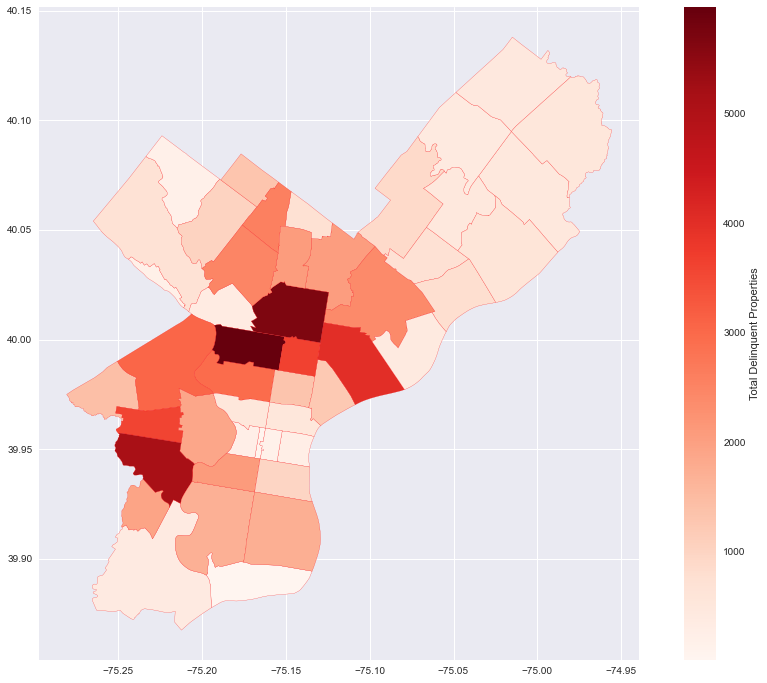

In [431]:
fig, ax = plt.subplots(figsize=(16,12))
poly_zip_tax_count.plot(ax=ax, column='opa_number',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Total Delinquent Properties'})

#sum of delinquent properties and the number of delinquent properties seems to be around in the same zip codes

In [448]:
poly_tax_zip_sum = pd.merge(poly_zip, tax_zip_sum, left_on = "CODE", right_on = "zip_code", how = 'left')
poly_tax_zip_sum.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,zip_code,principal_due,total_due,is_actionable
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045...",19120,5017812.12,9529801.48,880.0
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994...",19121,7093001.39,12953515.62,1827.0
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985...",19122,3344355.11,5839664.03,733.0
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970...",19123,3743411.62,5372027.03,298.0
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039...",19124,6791774.93,12672901.32,1142.0


<AxesSubplot:>

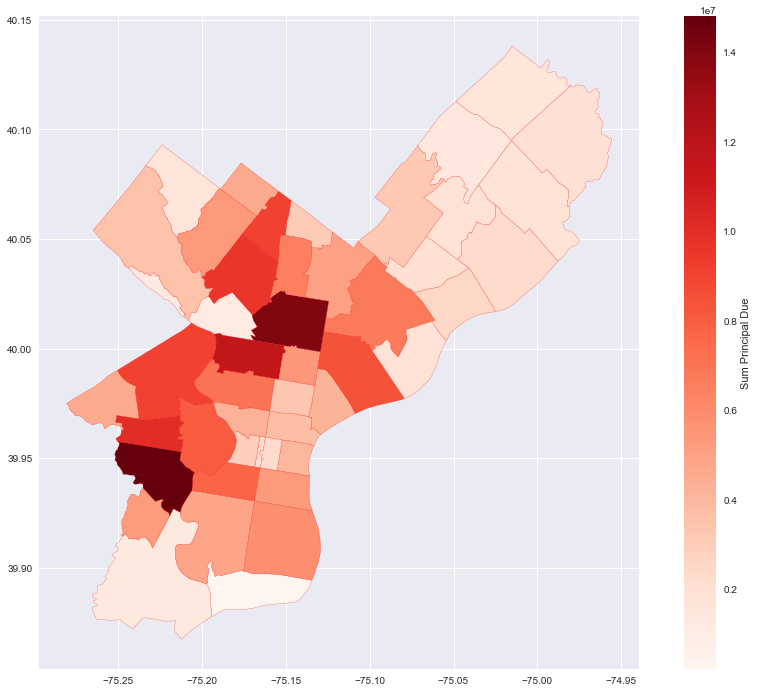

In [440]:
fig, ax = plt.subplots(figsize=(16,12))
poly_tax_zip_sum.plot(ax=ax, column='principal_due',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Sum Principal Due'})

<AxesSubplot:>

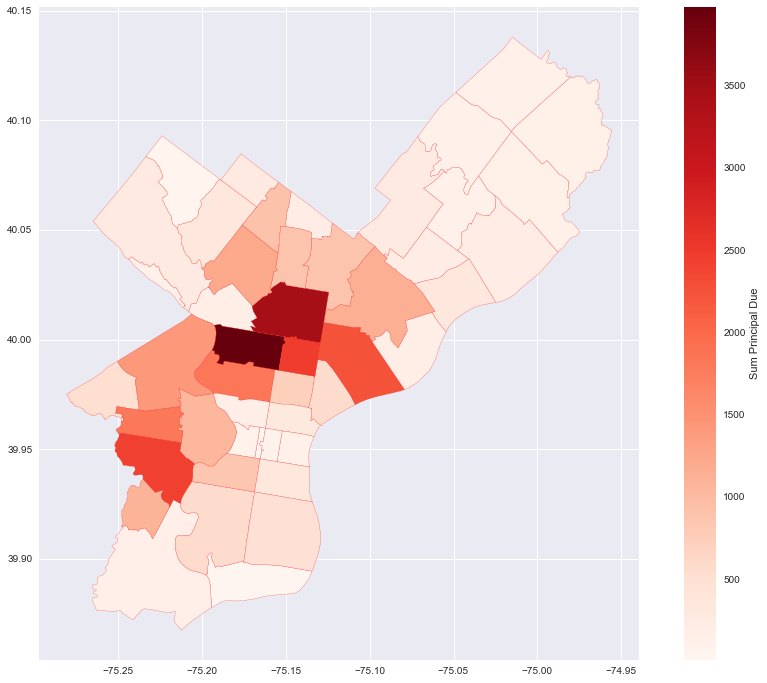

In [454]:
fig, ax = plt.subplots(figsize=(16,12))
poly_tax_zip_sum.plot(ax=ax, column='is_actionable',
            edgecolor='red', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Sum Principal Due for actionalble Items'})

In [441]:
tax['principal_due'].sum()

229224414.01999998

In [444]:
tax['is_actionable'].unique()

array([False,  True])

In [446]:
tax.loc[tax['is_actionable']== True]['principal_due'].sum()
#Actionable means that the city is actively working to collect these accounts, non-actional means that the city can't do anything further or thery are barrred from collection

121126557.50999999

In [457]:
tax.groupby(tax['is_actionable'])['principal_due'].sum().reset_index()
#Accounts that are in payment agreement, bankruptcy, or overdue but not yet delinquent are considered "not actionable".

,is_actionable,principal_due
0,False,1.080979e+08
1,True,1.211266e+08


In [459]:
tax.groupby(tax['is_actionable'])['principal_due'].sum()/tax['principal_due'].sum()#percentage of actional and non-actionable principal due  is almost the same 
#more percentage of principal due for actionaable

is_actionable
False    0.471581
True     0.528419
Name: principal_due, dtype: float64

In [475]:
tax.groupby(tax['num_years_owed'])['principal_due'].sum().reset_index().sort_values(by = ['principal_due'], ascending= False)
#Most of the principal due is owned for 1-4 years, then there is 25 years which has the highest principal due

,num_years_owed,principal_due
1,2,26959928.69
0,1,25667386.23
2,3,22582465.41
3,4,16764381.46
24,25,13166360.38
4,5,12543099.89
5,6,11032846.29
6,7,8113435.71
7,8,7243378.20
11,12,6592288.78


In [479]:
tax.groupby(tax['num_years_owed'])['principal_due'].median().reset_index().sort_values(by = ['principal_due'], ascending= False)
#when you do median, principal dues, it is 18, 23, 22 and 27 years.
#principal value is skewed so meadian is a better measure

,num_years_owed,principal_due
17,18,5783.580
22,23,5735.850
21,22,5725.700
26,27,5666.460
18,19,5291.020
27,28,5131.220
25,26,4909.580
19,20,4787.910
15,16,4720.230
16,17,4666.210


In [484]:
tax.groupby(tax['num_years_owed'])['opa_number'].count().reset_index().sort_values(by = ['opa_number'], ascending= False)
#most of the delinquent properties are between 1-6, then there is 25 years of delinquent properties

,num_years_owed,opa_number
0,1,26311
1,2,9556
2,3,6669
3,4,4562
4,5,3310
5,6,2626
24,25,2277
6,7,1827
7,8,1592
8,9,1246


<AxesSubplot:>

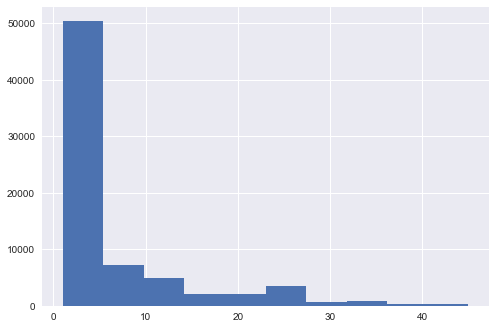

In [476]:
tax['num_years_owed'].hist()

<AxesSubplot:>

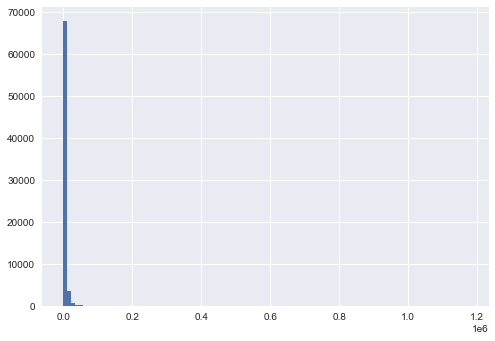

In [478]:
tax['principal_due'].hist(bins= 100)

In [485]:
tax.groupby(tax['building_category'])['opa_number'].count()# most of the dentinquent properties are  residential

building_category
commercial      6021
residential    65186
Name: opa_number, dtype: int64

In [488]:
tax.groupby(tax['building_category'])['opa_number'].count()/tax['opa_number'].count()

building_category
commercial     0.083072
residential    0.899378
Name: opa_number, dtype: float64

In [491]:
tax.columns

Index(['objectid', 'opa_number', 'street_address', 'zip_code', 'zip_4',
       'owner', 'co_owner', 'principal_due', 'penalty_due', 'interest_due',
       'other_charges_due', 'total_due', 'is_actionable', 'payment_agreement',
       'num_years_owed', 'most_recent_year_owed', 'oldest_year_owed',
       'most_recent_payment_date', 'year_of_last_assessment',
       'total_assessment', 'taxable_assessment', 'building_code',
       'detail_building_description', 'general_building_description',
       'building_category', 'coll_agency_num_years',
       'coll_agency_principal_owed', 'coll_agency_total_owed',
       'exempt_abatement_assessment', 'homestead_value',
       'net_tax_value_after_homestead', 'sequestration_enforcement',
       'bankruptcy', 'sheriff_sale', 'liens_sold_1990s', 'liens_sold_2015',
       'assessment_under_appeal', 'year_month', 'lat', 'lng', 'geometry'],
      dtype='object')

In [505]:
tax['year_month'] = pd.to_datetime(tax['year_month'], format="%Y%m")
tax['year'] = pd.DatetimeIndex(tax['year_month']).year
tax.head()

,objectid,opa_number,street_address,zip_code,zip_4,owner,co_owner,principal_due,penalty_due,interest_due,...,bankruptcy,sheriff_sale,liens_sold_1990s,liens_sold_2015,assessment_under_appeal,year_month,lat,lng,geometry,year
0,2556493,493169300.0,6045 N CAMAC ST,19141,3227.0,WILLIAMS JACQUELINE,WILLIAMS JACQUELINE,12200.18,1110.17,14261.97,...,False,N,False,N,False,2021-11-01,-75.140099,40.045081,POINT (-75.14010 40.04508),2021
1,2556494,493179100.0,5620 N CAMAC ST,19141,4106.0,RAY MATTIE E,RAY MATTIE E,-0.05,0.00,41.05,...,False,N,False,N,False,2021-11-01,-75.141930,40.039007,POINT (-75.14193 40.03901),2021
2,2556495,493180700.0,5714 N CAMAC ST,19141,4108.0,TOMLIN PAULA,TOMLIN PAULA,895.87,0.00,120.94,...,False,N,False,N,False,2021-11-01,-75.141727,40.039940,POINT (-75.14173 40.03994),2021
3,2556496,493183600.0,5812 N CAMAC ST,19141,4123.0,BATTS PRINCETON B,BATTS PRINCETON B,4536.94,283.14,1161.05,...,False,N,False,N,False,2021-11-01,-75.141395,40.041404,POINT (-75.14140 40.04140),2021
4,2556497,223166200.0,420 GLEN ECHO RD,19119,2914.0,WHITE CLARENCE,WHITE CLARENCE,4224.60,0.00,570.32,...,False,N,False,N,False,2021-11-01,-75.195309,40.051563,POINT (-75.19531 40.05156),2021


In [506]:
tax.groupby(tax['year'])['principal_due'].sum()

year
2021    2.292244e+08
Name: principal_due, dtype: float64

In [494]:
tax[['is_actionable', 'bankruptcy', 'sheriff_sale', 'sequestration_enforcement', 'payment_agreement', 'principal_due']]

,is_actionable,bankruptcy,sheriff_sale,sequestration_enforcement,payment_agreement,principal_due
0,False,False,N,False,True,12200.18
1,False,False,N,False,True,-0.05
2,False,False,N,False,False,895.87
3,False,False,N,False,True,4536.94
4,False,False,N,False,False,4224.60
...,...,...,...,...,...,...
72713,False,False,N,False,True,71.34
72714,False,False,N,False,False,1542.58
72715,False,False,N,False,True,2504.38
72716,True,False,N,False,False,4079.25


In [519]:
#bankrupcy is non-actionable
print(tax.groupby(tax['bankruptcy'])['principal_due'].sum())
print(tax['bankruptcy'].value_counts())

bankruptcy
False    2.292244e+08
Name: principal_due, dtype: float64
False    72479
Name: bankruptcy, dtype: int64


In [ ]:
#payment agreement non-actionable. Payment agreement is one of the way the city collect debts
print(tax.groupby(tax['payment_agreement'])['principal_due'].sum())
print(tax['payment_agreement'].value_counts())


payment_agreement
False    1.482439e+08
True     8.098053e+07
Name: principal_due, dtype: float64
False    48678
True     23801
Name: payment_agreement, dtype: int64


In [520]:
#sheriff sale is actionable. A sheriff's sale is a public auction where mortgage lenders, banks, tax collectors, and other litigants can collect money lost on property
print(tax.groupby(tax['sheriff_sale'])['principal_due'].sum())
print(tax['sheriff_sale'].value_counts())

sheriff_sale
N    2.138628e+08
Y    1.536159e+07
Name: principal_due, dtype: float64
N    70314
Y     2165
Name: sheriff_sale, dtype: int64


In [521]:
# sequestration is actionable
#The taking of someones property, voluntarily (by deposit) or involuntarily (by seizure), 
# by court officers or into the possession of a third party, awaiting the outcome of a trial in which ownership of that property is at issue
#If the delinquent property is a rental property, the City can take over the rent collection and apply those rental payments to the delinquent Real Estate Tax bill.
print(tax.groupby(tax['sequestration_enforcement'])['principal_due'].sum())
print(tax['sequestration_enforcement'].value_counts())



sequestration_enforcement
False    2.287520e+08
True     4.724364e+05
Name: principal_due, dtype: float64
False    72381
True        98
Name: sequestration_enforcement, dtype: int64


In [524]:
#The assessment appeal process allows property owners the opportunity to dispute the value determined by the Department.
print(tax.groupby(tax['assessment_under_appeal'])['principal_due'].sum())
print(tax['assessment_under_appeal'].value_counts())
#most of the assessment are not under appeal

assessment_under_appeal
False    2.230154e+08
True     6.208983e+06
Name: principal_due, dtype: float64
False    71971
True       508
Name: assessment_under_appeal, dtype: int64


/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_74088/1335946433.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tax.hist(ax=ax)


array([[<AxesSubplot:title={'center':'objectid'}>,
        <AxesSubplot:title={'center':'opa_number'}>,
        <AxesSubplot:title={'center':'zip_4'}>,
        <AxesSubplot:title={'center':'principal_due'}>,
        <AxesSubplot:title={'center':'penalty_due'}>],
       [<AxesSubplot:title={'center':'interest_due'}>,
        <AxesSubplot:title={'center':'other_charges_due'}>,
        <AxesSubplot:title={'center':'total_due'}>,
        <AxesSubplot:title={'center':'num_years_owed'}>,
        <AxesSubplot:title={'center':'most_recent_year_owed'}>],
       [<AxesSubplot:title={'center':'oldest_year_owed'}>,
        <AxesSubplot:title={'center':'year_of_last_assessment'}>,
        <AxesSubplot:title={'center':'total_assessment'}>,
        <AxesSubplot:title={'center':'taxable_assessment'}>,
        <AxesSubplot:title={'center':'coll_agency_num_years'}>],
       [<AxesSubplot:title={'center':'coll_agency_principal_owed'}>,
        <AxesSubplot:title={'center':'coll_agency_total_owed'}>,
    

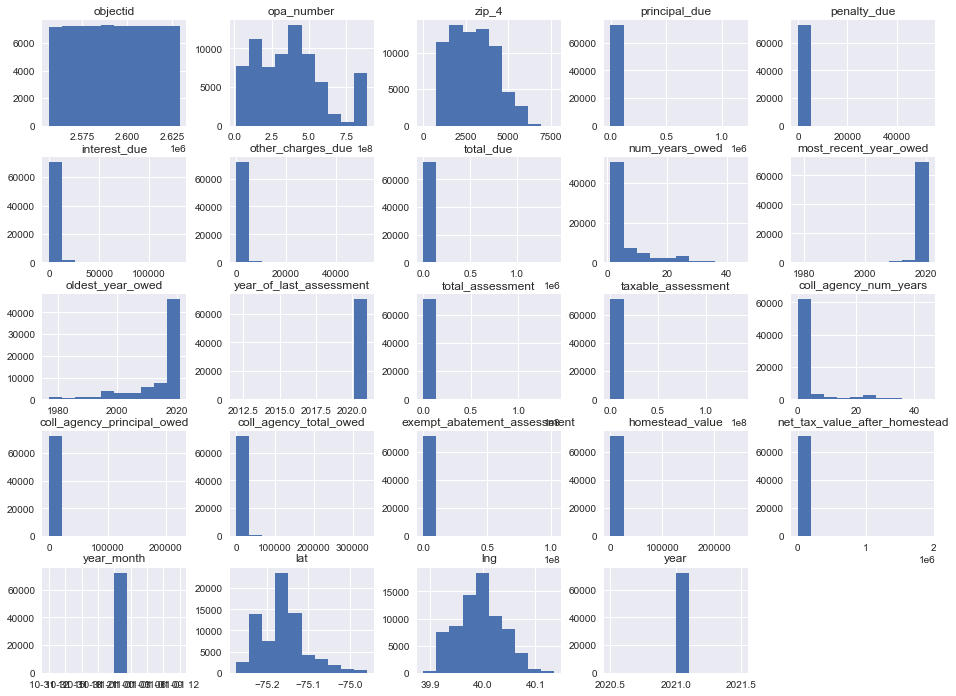

In [526]:
fig, ax = plt.subplots(figsize=(16,12))
tax.hist(ax=ax)

In [533]:
tax['general_building_description'].unique()

array(['house', 'theater_stadium_other amuse', 'vacantLand', 'mixedUsage',
       'apartmentSmall', 'retail', 'industrial', nan, 'apartmentLarge',
       'miscCommercial', 'nonProfit', 'parking_garage', 'condo', 'garage',
       'hotel', 'Restaurant_Bar', 'officeBuilding', 'miscResidential',
       'parkingLot', 'bank', 'utility'], dtype=object)

In [537]:
tax.groupby(tax['general_building_description'])['principal_due'].sum().sort_values(ascending=False)#principal due is also the most for house and vacant land

general_building_description
house                          1.331961e+08
vacantLand                     3.026161e+07
apartmentSmall                 1.320392e+07
mixedUsage                     1.133693e+07
apartmentLarge                 9.104813e+06
nonProfit                      5.194570e+06
industrial                     4.105313e+06
retail                         3.802362e+06
condo                          3.304997e+06
miscCommercial                 2.440253e+06
officeBuilding                 1.892045e+06
parkingLot                     1.778640e+06
theater_stadium_other amuse    1.595614e+06
Restaurant_Bar                 7.796232e+05
parking_garage                 6.016357e+05
garage                         5.697422e+05
hotel                          4.450313e+05
miscResidential                2.573390e+05
utility                        5.262612e+04
bank                           9.603020e+03
Name: principal_due, dtype: float64

In [536]:
print(tax['general_building_description'].value_counts()) # most of them are houses and vacant lots

house                          49796
vacantLand                     11623
apartmentSmall                  3528
mixedUsage                      2374
condo                            910
industrial                       560
retail                           415
nonProfit                        365
apartmentLarge                   331
miscCommercial                   324
garage                           275
parkingLot                       235
miscResidential                  191
theater_stadium_other amuse       90
officeBuilding                    76
Restaurant_Bar                    71
hotel                             22
parking_garage                    16
bank                               3
utility                            2
Name: general_building_description, dtype: int64


In [541]:
tax.groupby(tax['general_building_description'])['principal_due'].median().sort_values(ascending=False)#howver, the median and mean is not high for house and vacant lots

general_building_description
utility                        26313.060
officeBuilding                  8626.265
apartmentLarge                  8141.580
hotel                           7714.150
Restaurant_Bar                  6149.910
theater_stadium_other amuse     5572.080
nonProfit                       4324.050
parking_garage                  4072.705
retail                          3360.110
miscCommercial                  3225.140
bank                            2920.940
industrial                      2705.660
mixedUsage                      2397.415
apartmentSmall                  2069.885
condo                           1121.630
vacantLand                      1101.110
house                           1086.830
parkingLot                       979.070
garage                           911.270
miscResidential                  494.970
Name: principal_due, dtype: float64

### License and Code Violations